In [0]:
import requests
from bs4 import BeautifulSoup

# kospi 200

In [0]:
url = "https://finance.naver.com//sise/sise_index_day.nhn?"
new_list_date = []
new_list_price = []
for x in range(1,558,1):
    params = {
        'code': 'KPI200',
        'page': x
}
    
    resp = requests.get(url,params=params)
    
    soup = BeautifulSoup(resp.content,'html.parser')
    tr_list = soup.find_all('tr')
    
    for i in range(2,5):
        date = tr_list[i].find('td',class_='date').text
        date = date.replace('.','')
        price = tr_list[i].find('td',class_='number_1').text
    
        new_list_date.append(date)
        new_list_price.append(price)
    
    for i in range(9,12):
    
        date = tr_list[i].find('td',class_='date').text
        date = date.replace('.','')
        price = tr_list[i].find('td',class_='number_1').text
    
        new_list_date.append(date)
        new_list_price.append(price)


# S&P 500

In [0]:
url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol=SPI@SPX&fdtc=0'
new_list_date_2 = []
new_list_price_2 = []
for x in range(1,442):
    params = {
        'page': x
}
    resp = requests.get(url,params=params)
    soup = resp.json()
    #print(soup)
    
    for i in soup: 
        
        date_2 = i['xymd']
        price_2 = i['clos']
        new_list_date_2.append(date_2)
        new_list_price_2.append(price_2)

### kospi200을 df_1에 넣기

In [0]:
import pandas as pd
df_1 = pd.DataFrame()
df_1['date'] = new_list_date
df_1['KOSPI200_price'] = new_list_price

In [0]:
df_1 = df_1[:3337]

In [0]:
df_1['KOSPI200_price'] = pd.to_numeric(df_1['KOSPI200_price'])

### s&p500을 df_2에 넣기

In [0]:
df_2 = pd.DataFrame()
df_2['date'] = new_list_date_2
df_2['SP500_price'] = new_list_price_2

In [0]:
df_2['SP500_price'] = pd.to_numeric(df_2['SP500_price'])

In [0]:
df = pd.merge(df_1,df_2, how = 'outer' ,on = 'date')  

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
df = df.set_index('date')

In [0]:
df.head()

,KOSPI200_price,SP500_price
date,,
2019-07-03,272.37,NaN
2019-07-02,275.97,2973.01
2019-07-01,277.27,2964.33
2019-06-28,277.50,2941.76
2019-06-27,277.75,2924.92


In [0]:
df = df.fillna(method = 'ffill')
if df.isnull().values.any():
    df = df.fillna(method = 'bfill')

In [0]:
df.head()

,KOSPI200_price,SP500_price
date,,
2019-07-03,272.37,2973.01
2019-07-02,275.97,2973.01
2019-07-01,277.27,2964.33
2019-06-28,277.50,2941.76
2019-06-27,277.75,2924.92


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


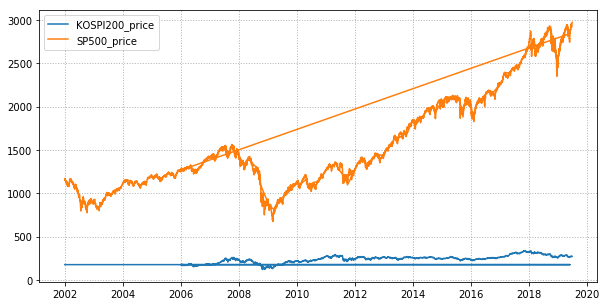

In [0]:
plt.figure(figsize=(10,5))  # 크기조절
plt.plot(df['KOSPI200_price']) 
plt.plot(df['SP500_price'])
plt.legend(loc=0)  # 범례지정
plt.grid(True, color = '0.7',linestyle = ':',linewidth = 1)

In [0]:
import pandas as pd
excel_writer = pd.ExcelWriter('KOSPI200_SP500_date_price.xlsx', engine = 'xlsxwriter')
df.to_excel(excel_writer, sheet_name = 'data')
excel_writer.save()